In [115]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Stateflow Epoch Metrics Visualization

Visualize the state and action loss metrics from `stateflow_epoch_metrics.csv` to analyze model performance on state and action prediction tasks.

In [116]:
# Load stateflow epoch metrics
sf_df = pd.read_csv('stateflow_epoch_metrics.csv')

# Display the first few rows to understand the data structure
print("First 5 rows of stateflow data:")
print(sf_df.head())

# Check for columns in the dataframe
print("\nColumns in the stateflow dataset:")
print(sf_df.columns.tolist())

First 5 rows of stateflow data:
   epoch  train_winner_loss  train_action_loss  train_combined_loss  \
0    NaN           2.676192           1.403165             4.079357   
1    0.0           1.517394           1.749480             3.202898   
2    1.0           1.208504           1.633357             2.741131   
3    2.0           1.158684           1.625577             2.666637   
4    3.0           1.130534           1.607206             2.615230   

   val_winner_loss  val_action_loss  val_combined_loss  train_time_sec  \
0         2.673263         1.389899           4.063162      607.858527   
1         1.235399         1.478422           2.646428      620.856691   
2         1.151171         1.470503           2.542963      621.798521   
3         1.101506         1.418316           2.449623      621.442841   
4         1.095239         1.443370           2.459857      621.541261   

   val_time_sec  total_time_sec  winner_err_log_scale  action_err_log_scale  
0    124.921378   

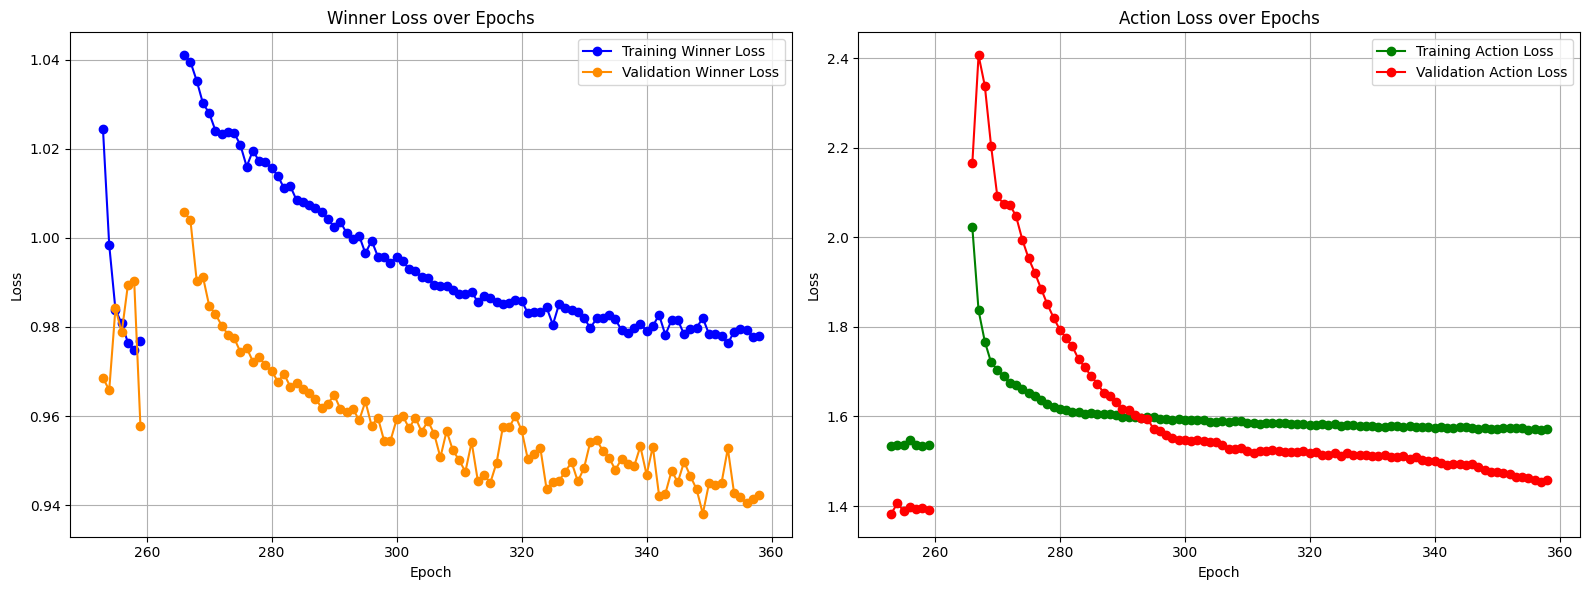

In [117]:
# Drop any rows where 'epoch' is missing or not a number
sf_df = sf_df[pd.to_numeric(sf_df['epoch'], errors='coerce').notnull()]
sf_df['epoch'] = sf_df['epoch'].astype(int)

# Add parameters to control which data points to show
sf_drop_first_n = 250
exclude_epochs = [250, 251, 252, 260, 261, 262, 263, 264, 265]  # List of epoch numbers to exclude from visualization

# Filter out excluded epochs
filtered_sf_df = sf_df.iloc[sf_drop_first_n:]
if exclude_epochs: 
    loss_columns = ['train_winner_loss', 'val_winner_loss', 'train_action_loss', 'val_action_loss', 'train_combined_loss', 'val_combined_loss']
    filtered_sf_df.loc[filtered_sf_df['epoch'].isin(exclude_epochs), loss_columns] = np.nan

# Plot 1: Winner and Action Loss vs Epochs - Combined training and validation in same plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Winner loss (training and validation combined)
axes[0].plot(filtered_sf_df['epoch'], filtered_sf_df['train_winner_loss'], 
             marker='o', linestyle='-', color='blue', label='Training Winner Loss')
axes[0].plot(filtered_sf_df['epoch'], filtered_sf_df['val_winner_loss'], 
             marker='o', linestyle='-', color='darkorange', label='Validation Winner Loss')
axes[0].set_title('Winner Loss over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Action loss (training and validation combined)
axes[1].plot(filtered_sf_df['epoch'], filtered_sf_df['train_action_loss'], 
             marker='o', linestyle='-', color='green', label='Training Action Loss')
axes[1].plot(filtered_sf_df['epoch'], filtered_sf_df['val_action_loss'], 
             marker='o', linestyle='-', color='red', label='Validation Action Loss')
axes[1].set_title('Action Loss over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

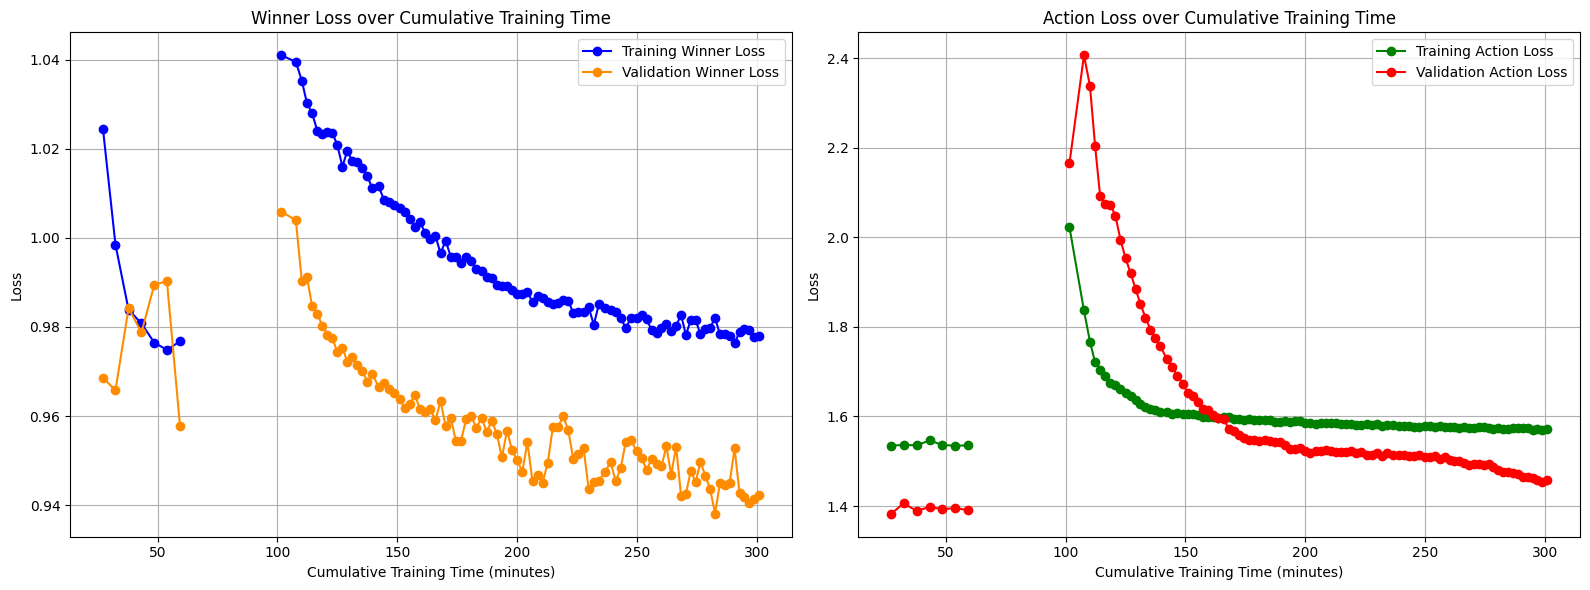

In [118]:
# Plot 2: Winner and Action Loss vs Cumulative Training Time - Combined training and validation

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Convert cumulative time from seconds to minutes
cumulative_time_min = sf_df.iloc[sf_drop_first_n:]['train_time_sec'].cumsum() / 60

# Winner loss (training and validation combined)
axes[0].plot(cumulative_time_min, sf_df.iloc[sf_drop_first_n:]['train_winner_loss'], 
             marker='o', linestyle='-', color='blue', label='Training Winner Loss')
axes[0].plot(cumulative_time_min, sf_df.iloc[sf_drop_first_n:]['val_winner_loss'], 
             marker='o', linestyle='-', color='darkorange', label='Validation Winner Loss')
axes[0].set_title('Winner Loss over Cumulative Training Time')
axes[0].set_xlabel('Cumulative Training Time (minutes)')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Action loss (training and validation combined)
axes[1].plot(cumulative_time_min, sf_df.iloc[sf_drop_first_n:]['train_action_loss'], 
             marker='o', linestyle='-', color='green', label='Training Action Loss')
axes[1].plot(cumulative_time_min, sf_df.iloc[sf_drop_first_n:]['val_action_loss'], 
             marker='o', linestyle='-', color='red', label='Validation Action Loss')
axes[1].set_title('Action Loss over Cumulative Training Time')
axes[1].set_xlabel('Cumulative Training Time (minutes)')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Stateflow Loss Metrics Visualization Summary

The above plots show the progression of state and action loss metrics for both training and validation sets. Use these to:

- Assess if the model is improving in predicting both state and action.
- Compare training and validation losses for overfitting or underfitting.
- Identify if either state or action prediction is lagging behind, which may suggest model or data issues.

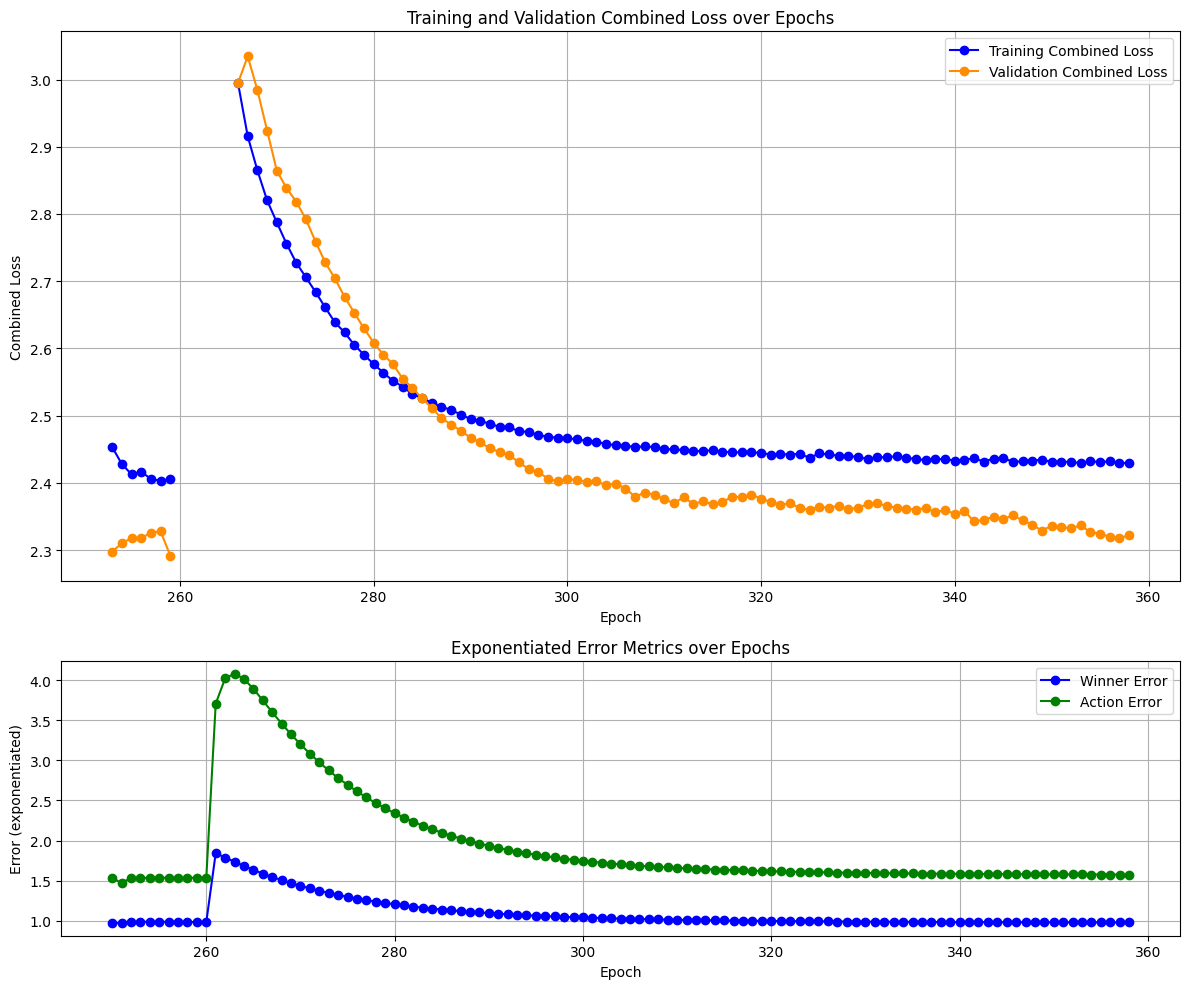

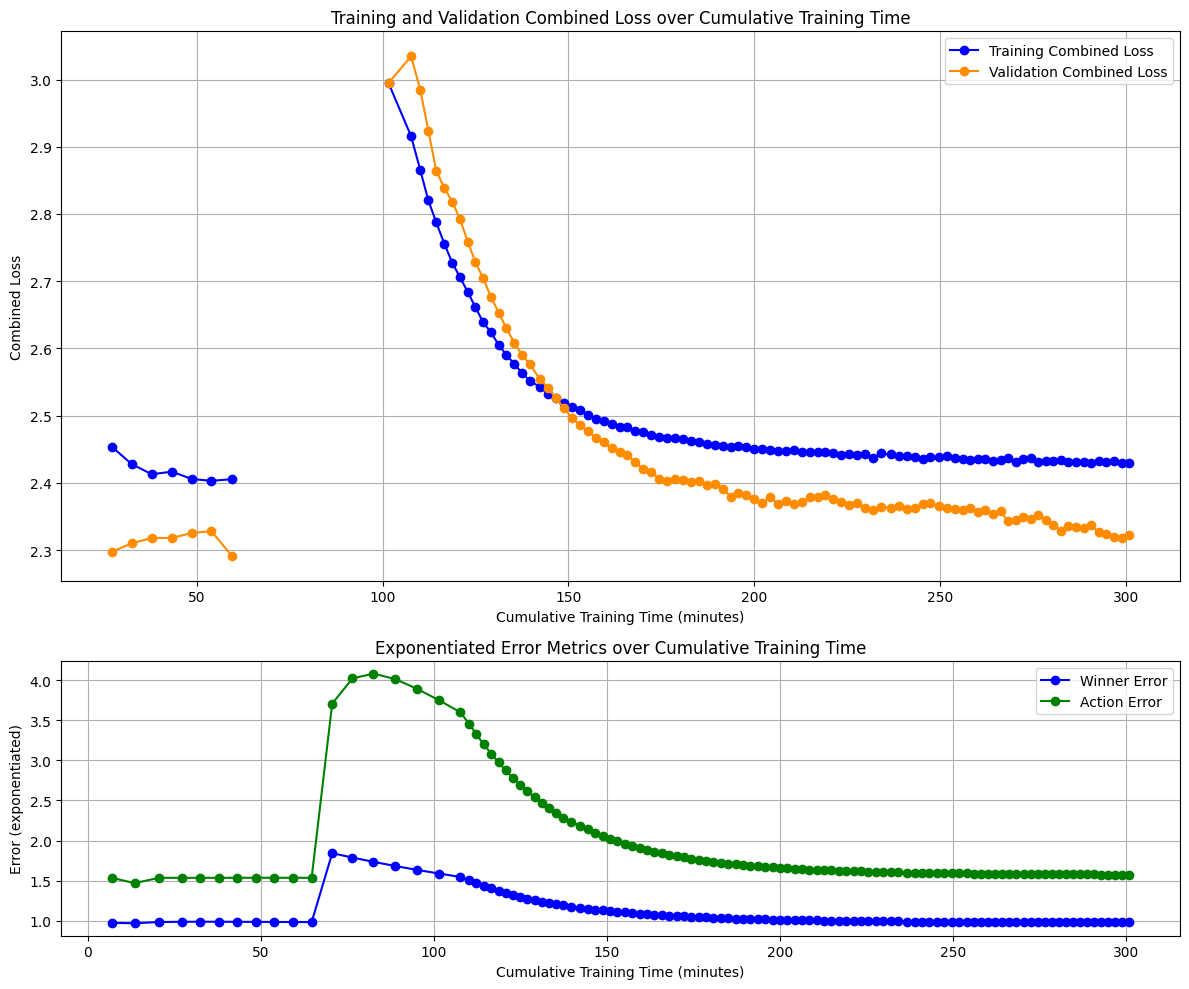

In [119]:
# Plot 3: Combined Loss Visualization - Vertical Layout

# First plot - Combined Loss vs Epochs
fig_combined_epoch, axes_combined_epoch = plt.subplots(2, 1, figsize=(12, 10), 
                                                     gridspec_kw={'height_ratios': [2, 1]})

# Top axes: Both training and validation combined loss
axes_combined_epoch[0].plot(sf_df.iloc[sf_drop_first_n:]['epoch'], 
                           sf_df.iloc[sf_drop_first_n:]['train_combined_loss'], 
                           marker='o', linestyle='-', color='blue', 
                           label='Training Combined Loss')
axes_combined_epoch[0].plot(sf_df.iloc[sf_drop_first_n:]['epoch'], 
                           sf_df.iloc[sf_drop_first_n:]['val_combined_loss'], 
                           marker='o', linestyle='-', color='darkorange', 
                           label='Validation Combined Loss')
axes_combined_epoch[0].set_title('Training and Validation Combined Loss over Epochs')
axes_combined_epoch[0].set_xlabel('Epoch')
axes_combined_epoch[0].set_ylabel('Combined Loss')
axes_combined_epoch[0].legend()
axes_combined_epoch[0].grid(True)

# Bottom axes: Exponentiated error metrics
exp_winner_err = np.exp(sf_df.iloc[sf_drop_first_n:]['winner_err_log_scale'])
exp_action_err = np.exp(sf_df.iloc[sf_drop_first_n:]['action_err_log_scale'])

axes_combined_epoch[1].plot(sf_df.iloc[sf_drop_first_n:]['epoch'], exp_winner_err, 
                           marker='o', linestyle='-', color='blue', label='Winner Error')
axes_combined_epoch[1].plot(sf_df.iloc[sf_drop_first_n:]['epoch'], exp_action_err, 
                           marker='o', linestyle='-', color='green', label='Action Error')
axes_combined_epoch[1].set_title('Exponentiated Error Metrics over Epochs')
axes_combined_epoch[1].set_xlabel('Epoch')
axes_combined_epoch[1].set_ylabel('Error (exponentiated)')
axes_combined_epoch[1].legend()
axes_combined_epoch[1].grid(True)

plt.tight_layout()
plt.show()

# Second plot - Combined Loss vs Training Time
fig_combined_time, axes_combined_time = plt.subplots(2, 1, figsize=(12, 10), 
                                                   gridspec_kw={'height_ratios': [2, 1]})

# Convert cumulative time from seconds to minutes
cumulative_time_min = sf_df.iloc[sf_drop_first_n:]['train_time_sec'].cumsum() / 60

# Top axes: Both training and validation combined loss
axes_combined_time[0].plot(cumulative_time_min, 
                          sf_df.iloc[sf_drop_first_n:]['train_combined_loss'], 
                          marker='o', linestyle='-', color='blue', 
                          label='Training Combined Loss')
axes_combined_time[0].plot(cumulative_time_min, 
                          sf_df.iloc[sf_drop_first_n:]['val_combined_loss'], 
                          marker='o', linestyle='-', color='darkorange', 
                          label='Validation Combined Loss')
axes_combined_time[0].set_title('Training and Validation Combined Loss over Cumulative Training Time')
axes_combined_time[0].set_xlabel('Cumulative Training Time (minutes)')
axes_combined_time[0].set_ylabel('Combined Loss')
axes_combined_time[0].legend()
axes_combined_time[0].grid(True)

# Bottom axes: Exponentiated error metrics
axes_combined_time[1].plot(cumulative_time_min, exp_winner_err, 
                          marker='o', linestyle='-', color='blue', label='Winner Error')
axes_combined_time[1].plot(cumulative_time_min, exp_action_err, 
                          marker='o', linestyle='-', color='green', label='Action Error')
axes_combined_time[1].set_title('Exponentiated Error Metrics over Cumulative Training Time')
axes_combined_time[1].set_xlabel('Cumulative Training Time (minutes)')
axes_combined_time[1].set_ylabel('Error (exponentiated)')
axes_combined_time[1].legend()
axes_combined_time[1].grid(True)

plt.tight_layout()
plt.show()

# Combined Loss Visualization Summary

The plots above show the combined loss metrics which represent the overall model performance:

- The combined loss accounts for both state prediction and action prediction components
- The negative values in the combined loss are expected as they represent the model's improvement over time
- The difference between training and validation combined loss helps identify potential overfitting
- The horizontal red line in the difference plots marks zero - values above it indicate training loss is higher than validation loss

In [120]:
# load latest model

from learning.model.stateflow import DWStateFlowModel
import torch
import glob
import os


stateflow_model = DWStateFlowModel()

models_dir = "learning/stateflow_checkpoints" 

# Find the latest checkpoint file (with highest epoch number)
checkpoint_files = glob.glob(os.path.join(models_dir, "stateflow_*.pt"))

epoch_nums = [int(f.split("_")[-1].split(".")[0]) for f in checkpoint_files]
latest_epoch = max(epoch_nums)
latest_checkpoint = os.path.join(models_dir, f"stateflow_{latest_epoch}.pt")
checkpoint = torch.load(latest_checkpoint, map_location=torch.device('cpu'))
model_state = checkpoint["model_state"]
stateflow_model.load_state_dict(model_state)

print(f"Loading latest checkpoint: {latest_checkpoint} (epoch {latest_epoch})")

Loading latest checkpoint: learning/stateflow_checkpoints/stateflow_358.pt (epoch 358)


In [121]:
stateflow_model

DWStateFlowModel(
  (norm_fn): DWNorm()
  (gat_layers): ModuleList(
    (0): GATLayer(
      (message_fn): GATMessage(
        (input_dropout): Dropout(p=0, inplace=False)
        (transform_fn): Linear(in_features=8, out_features=8, bias=False)
      )
      (attention_coef_fn): GATAttentionCoefficients(
        (transform_fn): Linear(in_features=16, out_features=1, bias=False)
        (activation_fn): LeakyReLU(negative_slope=0.01)
      )
      (attention_dropout): Dropout(p=0.35, inplace=False)
      (activation_fn): ReLU()
      (residual_proj): Linear(in_features=8, out_features=8, bias=False)
      (residual_dropout): Dropout(p=0.35, inplace=False)
    )
    (1-2): 2 x GATLayer(
      (message_fn): GATMessage(
        (input_dropout): Dropout(p=0.35, inplace=False)
        (transform_fn): Linear(in_features=8, out_features=8, bias=False)
      )
      (attention_coef_fn): GATAttentionCoefficients(
        (transform_fn): Linear(in_features=16, out_features=1, bias=False)
       

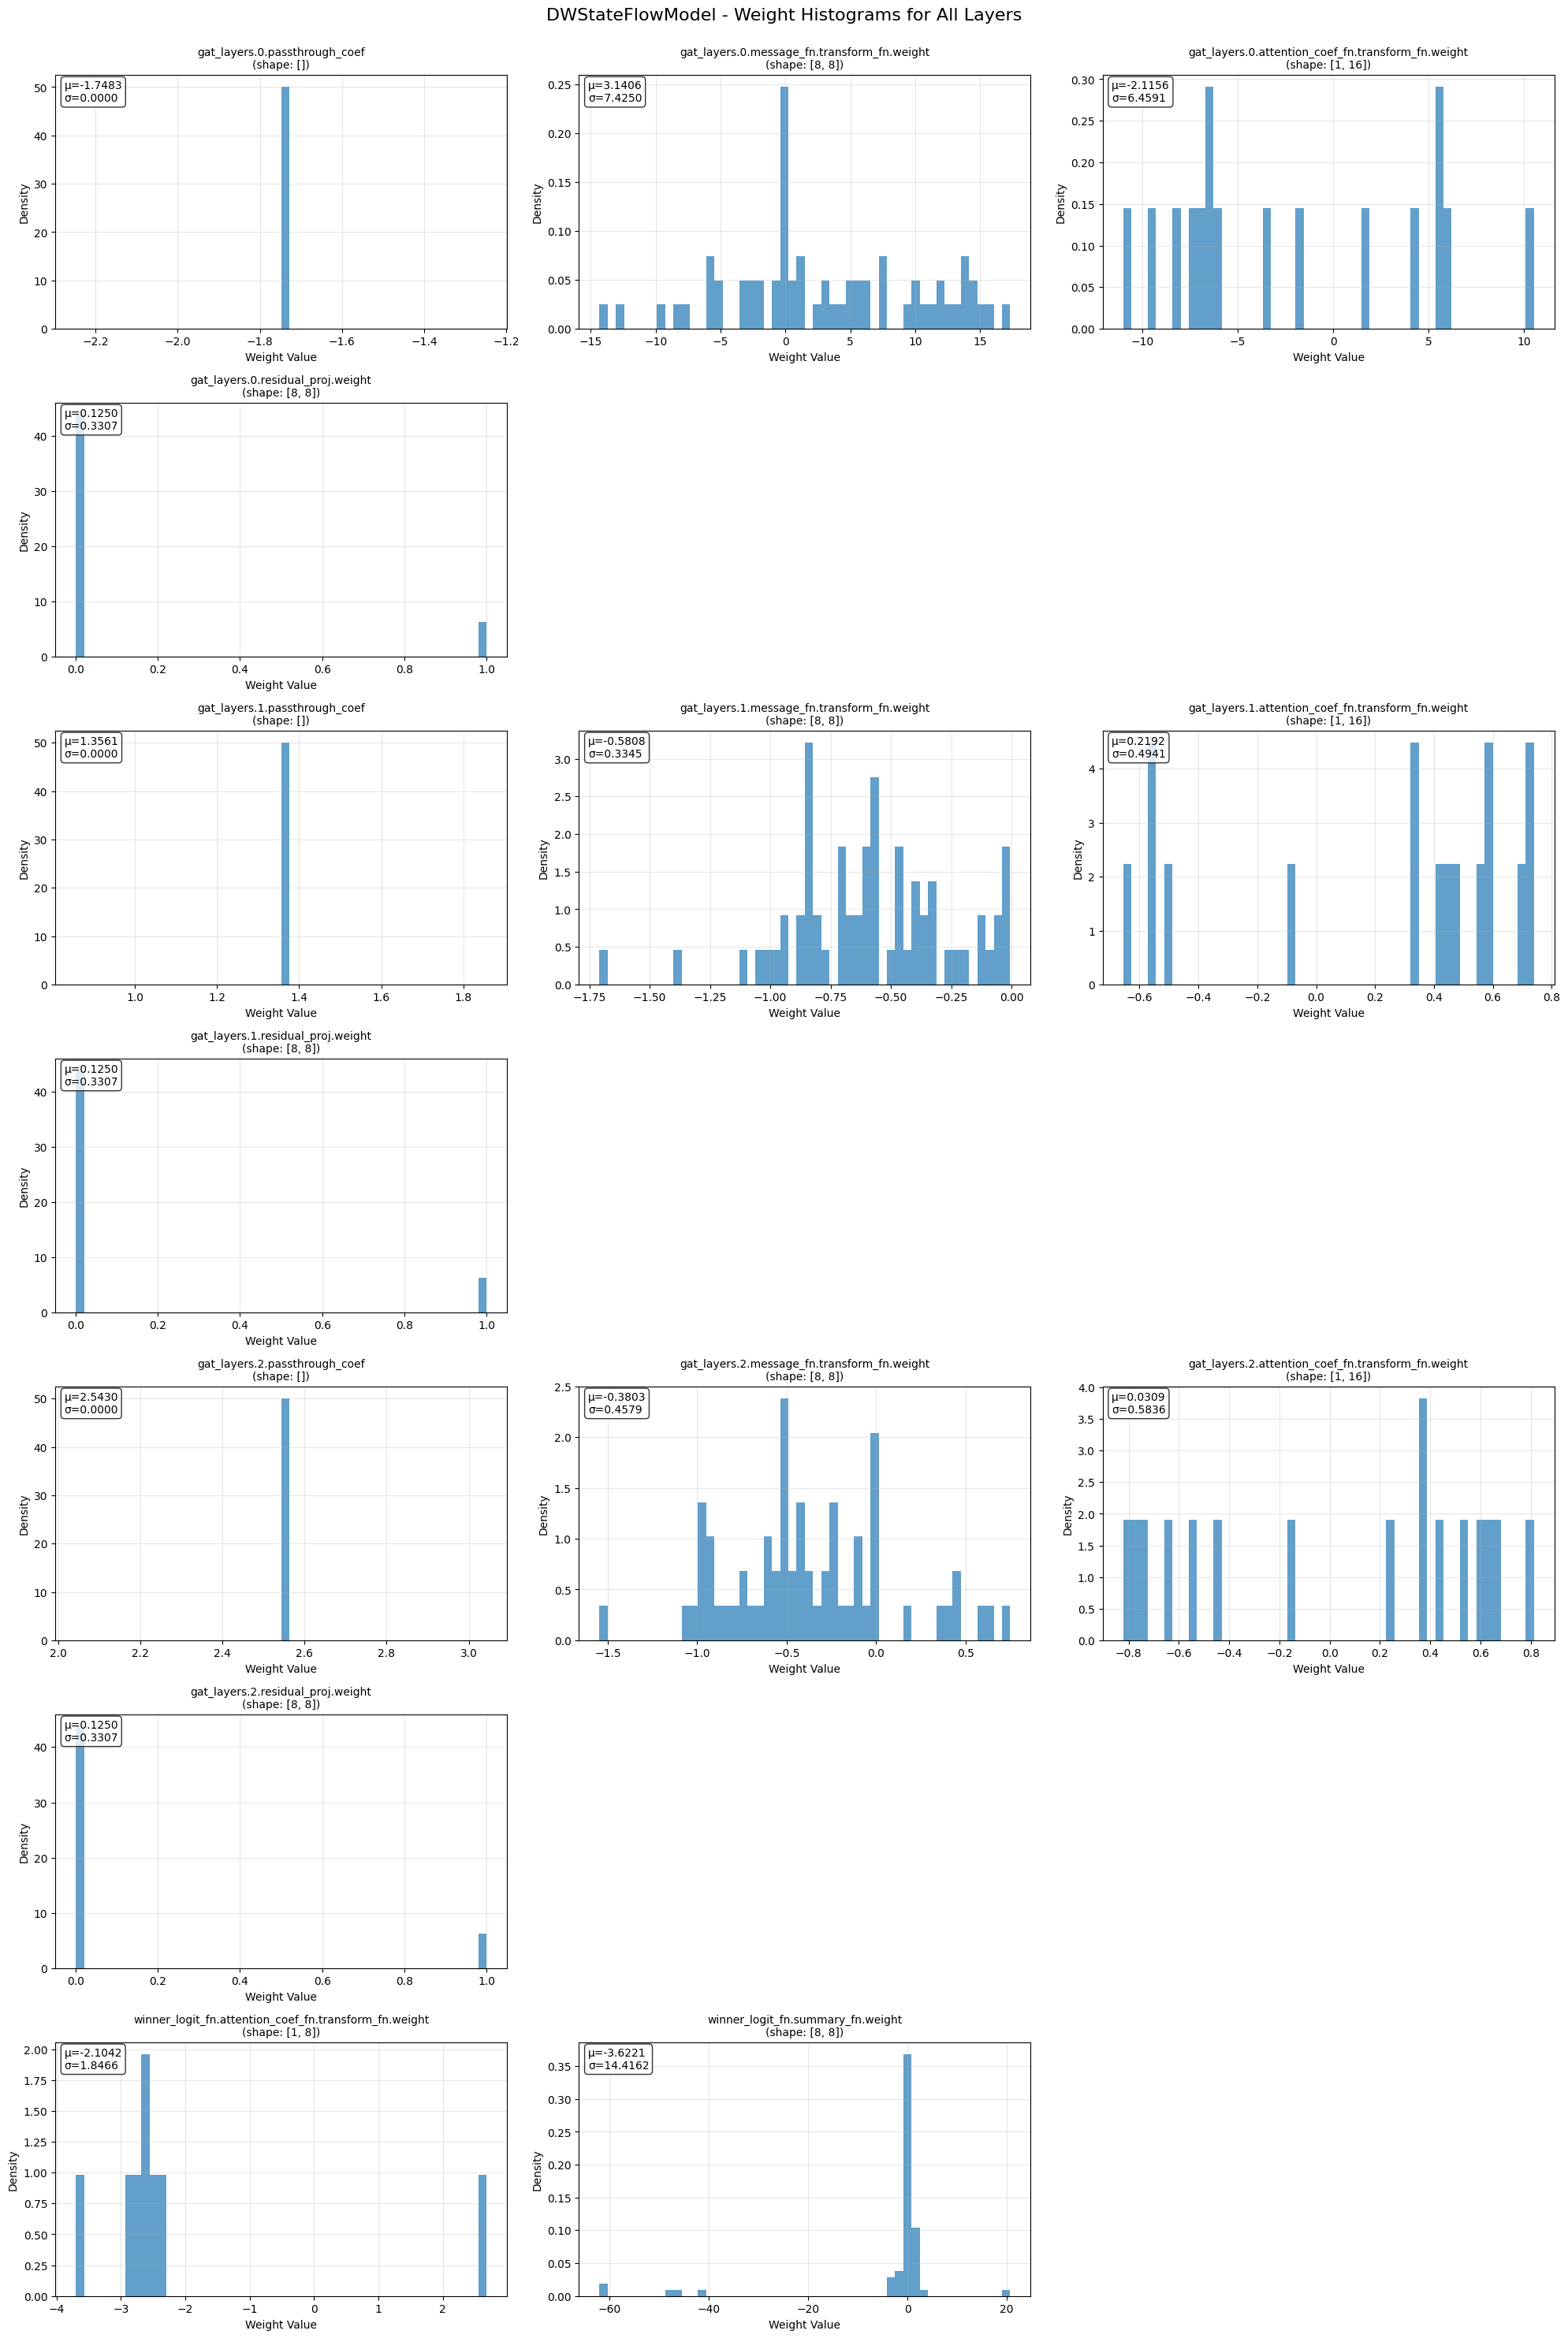

In [122]:
# Weight inspection: Create histograms for each layer
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

def plot_weight_histograms(model, title_prefix=""):
    """Plot histograms of weights for each named parameter in the model"""
    
    # Get all named parameters
    named_params = list(model.named_parameters())
    
    # Calculate grid dimensions
    n_params = len(named_params)
    n_cols = 3

    param_groups = defaultdict(list)
    for (name, param) in named_params:
        # prefix is either "word" or "word.<number>"
        prefix = re.match(r"^(\w+\.?(?:\d+(?:\.|$))?)", name).group(1)
        param_groups[prefix].append((name, param))
    
    n_rows = 0
    rows_per_group = []
    for pref, param_l in param_groups.items():
        rows_per_group.append(int(np.ceil(len(param_l) / n_cols)))
        n_rows += rows_per_group[0]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3 + 4 * n_rows))
    fig.suptitle(f'{title_prefix}Weight Histograms for All Layers', fontsize=16)
    
    # Flatten axes for easier indexing
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    

    for group_i, group in enumerate(param_groups.values()):
        group_axes = axes[
            n_cols * sum(rows_per_group[:group_i]) : n_cols * sum(rows_per_group[:(group_i+1)])
        ]
        for i, (name, param) in enumerate(group):
            ax = group_axes[i]
            
            # Convert parameter to numpy and flatten
            weights = param.detach().cpu().numpy().flatten()
            
            # Create histogram
            ax.hist(weights, bins=50, alpha=0.7, density=True)
            ax.set_title(f'{name}\n(shape: {list(param.shape)})', fontsize=10)
            ax.set_xlabel('Weight Value')
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
            
            # Add statistics as text
            mean_val = np.mean(weights)
            std_val = np.std(weights)
            ax.text(0.02, 0.98, f'μ={mean_val:.4f}\nσ={std_val:.4f}', 
                    transform=ax.transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        for ax in group_axes[i+1:]:
            ax.axis("off")

    # Hide any unused subplots
    for i in range(n_params, len(axes)):
        axes[i].set_visible(False)
    
    # Add padding at the top to prevent title overlap
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space for the title
    plt.show()

# Plot histograms for the loaded model
plot_weight_histograms(stateflow_model, "DWStateFlowModel - ")

In [123]:
# Weight statistics summary table
def analyze_weight_statistics(model):
    """Create a comprehensive summary of weight statistics"""
    
    stats_data = []
    
    for name, param in model.named_parameters():
        weights = param.detach().cpu().numpy().flatten()
        
        stats = {
            'Layer': name,
            'Shape': str(list(param.shape)),
            'Total Params': param.numel(),
            'Mean': np.mean(weights),
            'Std': np.std(weights),
            'Min': np.min(weights),
            'Max': np.max(weights),
            'Abs Mean': np.mean(np.abs(weights)),
            'Zero %': (weights == 0).sum() / len(weights) * 100,
            'Near Zero %': (np.abs(weights) < 0.001).sum() / len(weights) * 100
        }
        stats_data.append(stats)
    
    stats_df = pd.DataFrame(stats_data)
    return stats_df

# Generate and display weight statistics
weight_stats = analyze_weight_statistics(stateflow_model)
print("Weight Statistics Summary:")
print("=" * 100)
print(weight_stats.to_string(index=False, float_format='%.6f'))

# Summary statistics
total_params = sum(p.numel() for p in stateflow_model.parameters())
trainable_params = sum(p.numel() for p in stateflow_model.parameters() if p.requires_grad)

print(f"\nModel Summary:")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Number of layers with weights: {len(weight_stats)}")

# Analysis by layer type
print(f"\nParameter count by layer type:")
gat_params = weight_stats[weight_stats['Layer'].str.contains('gat_layers')]['Total Params'].sum()
attack_params = weight_stats[weight_stats['Layer'].str.contains('attack_logit')]['Total Params'].sum()
end_turn_params = weight_stats[weight_stats['Layer'].str.contains('end_turn')]['Total Params'].sum()
winner_params = weight_stats[weight_stats['Layer'].str.contains('winner')]['Total Params'].sum()

print(f"GAT layers: {gat_params:,} parameters ({gat_params/total_params*100:.1f}%)")
print(f"Attack logit function: {attack_params:,} parameters ({attack_params/total_params*100:.1f}%)")
print(f"End turn logit function: {end_turn_params:,} parameters ({end_turn_params/total_params*100:.1f}%)")
print(f"Winner logit function: {winner_params:,} parameters ({winner_params/total_params*100:.1f}%)")

Weight Statistics Summary:
                                                  Layer   Shape  Total Params       Mean       Std        Min       Max  Abs Mean    Zero %  Near Zero %
                          gat_layers.0.passthrough_coef      []             1  -1.748293  0.000000  -1.748293 -1.748293  1.748293  0.000000     0.000000
            gat_layers.0.message_fn.transform_fn.weight  [8, 8]            64   3.140605  7.424966 -14.331266 17.314013  6.201668  0.000000     0.000000
     gat_layers.0.attention_coef_fn.transform_fn.weight [1, 16]            16  -2.115624  6.459060 -10.998330 10.510930  6.279517  0.000000     0.000000
                      gat_layers.0.residual_proj.weight  [8, 8]            64   0.125000  0.330719   0.000000  1.000000  0.125000 87.500000    87.500000
                          gat_layers.1.passthrough_coef      []             1   1.356061  0.000000   1.356061  1.356061  1.356061  0.000000     0.000000
            gat_layers.1.message_fn.transform_fn.weight

/tmp/ipykernel_3239408/4207690230.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(box_data, labels=box_labels)


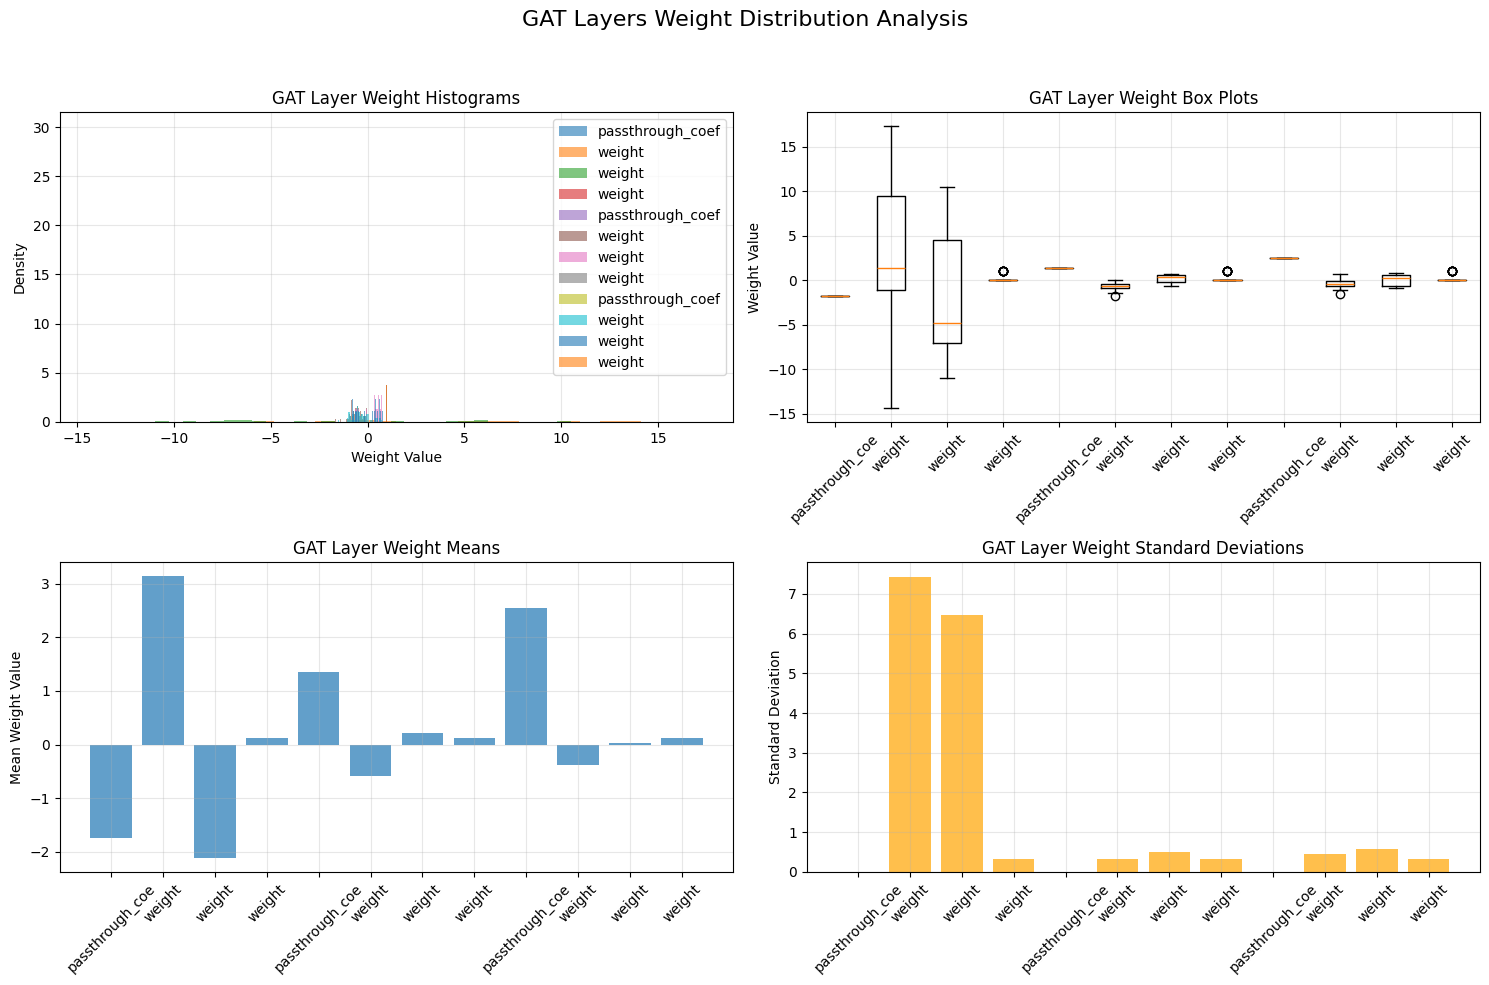

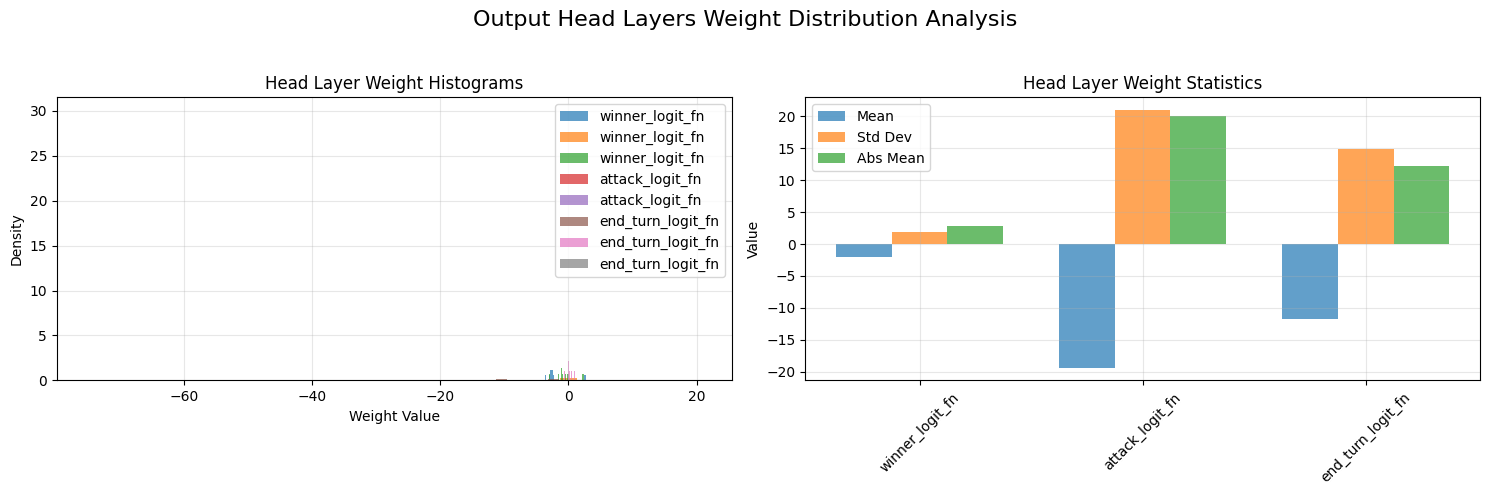

In [124]:
# Layer type comparison visualizations
def plot_layer_type_comparisons(model):
    """Create comparison plots for different layer types"""

    # Categorize layers
    gat_layers = {}
    head_layers = {}
    
    for name, param in model.named_parameters():
        if 'gat_layers' in name:
            gat_layers[name] = param.detach().cpu().numpy().flatten()
        elif any(head in name for head in ['winner_logit', 'attack_logit', 'end_turn']):
            head_layers[name] = param.detach().cpu().numpy().flatten()
    
    # Plot 1: GAT layers weight distribution comparison
    if gat_layers:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('GAT Layers Weight Distribution Analysis', fontsize=16)
        
        # Histogram comparison
        ax1 = axes[0, 0]
        for name, weights in gat_layers.items():
            layer_short = name.split('.')[-1]  # Get the last part of the name
            ax1.hist(weights, bins=30, alpha=0.6, label=layer_short[:20], density=True)
        ax1.set_title('GAT Layer Weight Histograms')
        ax1.set_xlabel('Weight Value')
        ax1.set_ylabel('Density')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Box plot comparison
        ax2 = axes[0, 1]
        box_data = list(gat_layers.values())
        box_labels = [name.split('.')[-1][:15] for name in gat_layers.keys()]
        ax2.boxplot(box_data, labels=box_labels)
        ax2.set_title('GAT Layer Weight Box Plots')
        ax2.set_ylabel('Weight Value')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        
        # Statistics comparison
        ax3 = axes[1, 0]
        means = [np.mean(weights) for weights in gat_layers.values()]
        stds = [np.std(weights) for weights in gat_layers.values()]
        layer_names = [name.split('.')[-1][:15] for name in gat_layers.keys()]
        
        x_pos = np.arange(len(layer_names))
        ax3.bar(x_pos, means, alpha=0.7, label='Mean')
        ax3.set_title('GAT Layer Weight Means')
        ax3.set_ylabel('Mean Weight Value')
        ax3.set_xticks(x_pos)
        ax3.set_xticklabels(layer_names, rotation=45)
        ax3.grid(True, alpha=0.3)
        
        # Standard deviations
        ax4 = axes[1, 1]
        ax4.bar(x_pos, stds, alpha=0.7, color='orange', label='Std Dev')
        ax4.set_title('GAT Layer Weight Standard Deviations')
        ax4.set_ylabel('Standard Deviation')
        ax4.set_xticks(x_pos)
        ax4.set_xticklabels(layer_names, rotation=45)
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
        plt.show()
    
    # Plot 2: Head layers comparison
    if head_layers:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Output Head Layers Weight Distribution Analysis', fontsize=16)
        
        # Histogram comparison
        ax1 = axes[0]
        for name, weights in head_layers.items():
            head_type = name.split('.')[0]  # Get the head type
            ax1.hist(weights, bins=30, alpha=0.7, label=head_type, density=True)
        ax1.set_title('Head Layer Weight Histograms')
        ax1.set_xlabel('Weight Value')
        ax1.set_ylabel('Density')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Statistics comparison
        ax2 = axes[1]
        head_stats = []
        head_names = []
        for name, weights in head_layers.items():
            head_type = name.split('.')[0]
            if head_type not in head_names:
                head_names.append(head_type)
                head_stats.append({
                    'mean': np.mean(weights),
                    'std': np.std(weights),
                    'abs_mean': np.mean(np.abs(weights))
                })
        
        x_pos = np.arange(len(head_names))
        width = 0.25
        
        means = [stat['mean'] for stat in head_stats]
        stds = [stat['std'] for stat in head_stats]
        abs_means = [stat['abs_mean'] for stat in head_stats]
        
        ax2.bar(x_pos - width, means, width, label='Mean', alpha=0.7)
        ax2.bar(x_pos, stds, width, label='Std Dev', alpha=0.7)
        ax2.bar(x_pos + width, abs_means, width, label='Abs Mean', alpha=0.7)
        
        ax2.set_title('Head Layer Weight Statistics')
        ax2.set_ylabel('Value')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(head_names, rotation=45)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
        plt.show()

# Generate layer type comparison plots
plot_layer_type_comparisons(stateflow_model)

In [125]:
epoch_nums = [int(f.split("_")[-1].split(".")[0]) for f in checkpoint_files]
latest_checkpoint = os.path.join(models_dir, f"stateflow_{latest_epoch}.pt")
checkpoint = torch.load(latest_checkpoint, map_location=torch.device('cpu'))

In [126]:
# Parameter Change Dynamics Analysis
def analyze_parameter_changes(models_dir, start_epoch=None, end_epoch=None, step=1):
    """
    Analyze parameter changes between consecutive model checkpoints
    
    Args:
        models_dir: Directory containing model checkpoints
        start_epoch: Starting epoch (if None, uses earliest available)
        end_epoch: Ending epoch (if None, uses latest available)
        step: Step size between epochs to analyze
    
    Returns:
        Dictionary with parameter change statistics
    """
    from learning.model.stateflow import DWStateFlowModel
    import torch
    import glob
    import os
    import numpy as np
    
    # Find all checkpoint files
    checkpoint_files = glob.glob(os.path.join(models_dir, "stateflow_*.pt"))
    epoch_nums = [int(f.split("_")[-1].split(".")[0]) for f in checkpoint_files]
    epoch_nums.sort()
    
    # Filter epochs based on parameters
    if start_epoch is not None:
        epoch_nums = [e for e in epoch_nums if e >= start_epoch]
    if end_epoch is not None:
        epoch_nums = [e for e in epoch_nums if e <= end_epoch]
    
    # Take every step-th epoch
    epoch_nums = epoch_nums[::step]
    
    if len(epoch_nums) < 2:
        print(f"Need at least 2 epochs to analyze changes. Found: {len(epoch_nums)}")
        return None
    
    print(f"Analyzing parameter changes for epochs: {epoch_nums[0]} to {epoch_nums[-1]} (step={step})")
    print(f"Total epochs to process: {len(epoch_nums)}")
    
    # Storage for results
    param_changes = {}
    epochs_analyzed = []
    
    # Load first model as reference
    prev_model = DWStateFlowModel()
    prev_checkpoint_path = os.path.join(models_dir, f"stateflow_{epoch_nums[0]}.pt")
    prev_checkpoint = torch.load(prev_checkpoint_path, map_location=torch.device('cpu'))
    prev_model.load_state_dict(prev_checkpoint["model_state"])
    
    # Analyze changes for each consecutive pair
    for i in range(1, len(epoch_nums)):
        curr_epoch = epoch_nums[i]
        
        # Load current model
        curr_model = DWStateFlowModel()
        curr_checkpoint_path = os.path.join(models_dir, f"stateflow_{curr_epoch}.pt")
        curr_checkpoint = torch.load(curr_checkpoint_path, map_location=torch.device('cpu'))
        curr_model.load_state_dict(curr_checkpoint["model_state"])
        
        # Calculate RMS differences for each parameter
        epoch_changes = {}
        for (prev_name, prev_param), (curr_name, curr_param) in zip(prev_model.named_parameters(), curr_model.named_parameters()):
            assert prev_name == curr_name, f"Parameter mismatch: {prev_name} vs {curr_name}"
            
            # Calculate RMS difference
            diff = curr_param.detach().cpu().numpy() - prev_param.detach().cpu().numpy()
            rms_diff = np.sqrt(np.mean(diff**2))
            
            # Also calculate relative change (RMS diff / RMS of previous weights)
            prev_rms = np.sqrt(np.mean(prev_param.detach().cpu().numpy()**2))
            relative_change = rms_diff / (prev_rms + 1e-8)  # Add small epsilon to avoid division by zero
            
            epoch_changes[prev_name] = {
                'rms_diff': rms_diff,
                'relative_change': relative_change,
                'prev_rms': prev_rms
            }
        
        # Store results
        epochs_analyzed.append(curr_epoch)
        for param_name, changes in epoch_changes.items():
            if param_name not in param_changes:
                param_changes[param_name] = {
                    'epochs': [],
                    'rms_diff': [],
                    'relative_change': [],
                    'prev_rms': []
                }
            param_changes[param_name]['epochs'].append(curr_epoch)
            param_changes[param_name]['rms_diff'].append(changes['rms_diff'])
            param_changes[param_name]['relative_change'].append(changes['relative_change'])
            param_changes[param_name]['prev_rms'].append(changes['prev_rms'])
        
        # Update previous model for next iteration
        prev_model = curr_model
        
        if i % 10 == 0 or i == len(epoch_nums) - 1:
            print(f"Processed {i}/{len(epoch_nums)-1} epoch pairs...")
    
    return param_changes, epochs_analyzed

# Analyze parameter changes (adjust start_epoch and step as needed)
# For faster analysis on large datasets, increase step size
param_changes, epochs_analyzed = analyze_parameter_changes(
    models_dir="learning/stateflow_checkpoints", 
    start_epoch=250,  # Start from epoch 250 to match your filtering
    step=1  # Analyze every epoch (set to higher value like 5 or 10 for faster processing)
)

Analyzing parameter changes for epochs: 250 to 358 (step=1)
Total epochs to process: 109
Processed 10/108 epoch pairs...
Processed 20/108 epoch pairs...
Processed 30/108 epoch pairs...
Processed 40/108 epoch pairs...
Processed 50/108 epoch pairs...
Processed 60/108 epoch pairs...
Processed 70/108 epoch pairs...
Processed 80/108 epoch pairs...
Processed 90/108 epoch pairs...
Processed 100/108 epoch pairs...
Processed 50/108 epoch pairs...
Processed 60/108 epoch pairs...
Processed 70/108 epoch pairs...
Processed 80/108 epoch pairs...
Processed 90/108 epoch pairs...
Processed 100/108 epoch pairs...
Processed 108/108 epoch pairs...
Processed 108/108 epoch pairs...


/tmp/ipykernel_3239408/1526000855.py:113: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax4.plot(epochs, rms_diffs, 'o-', label=label,


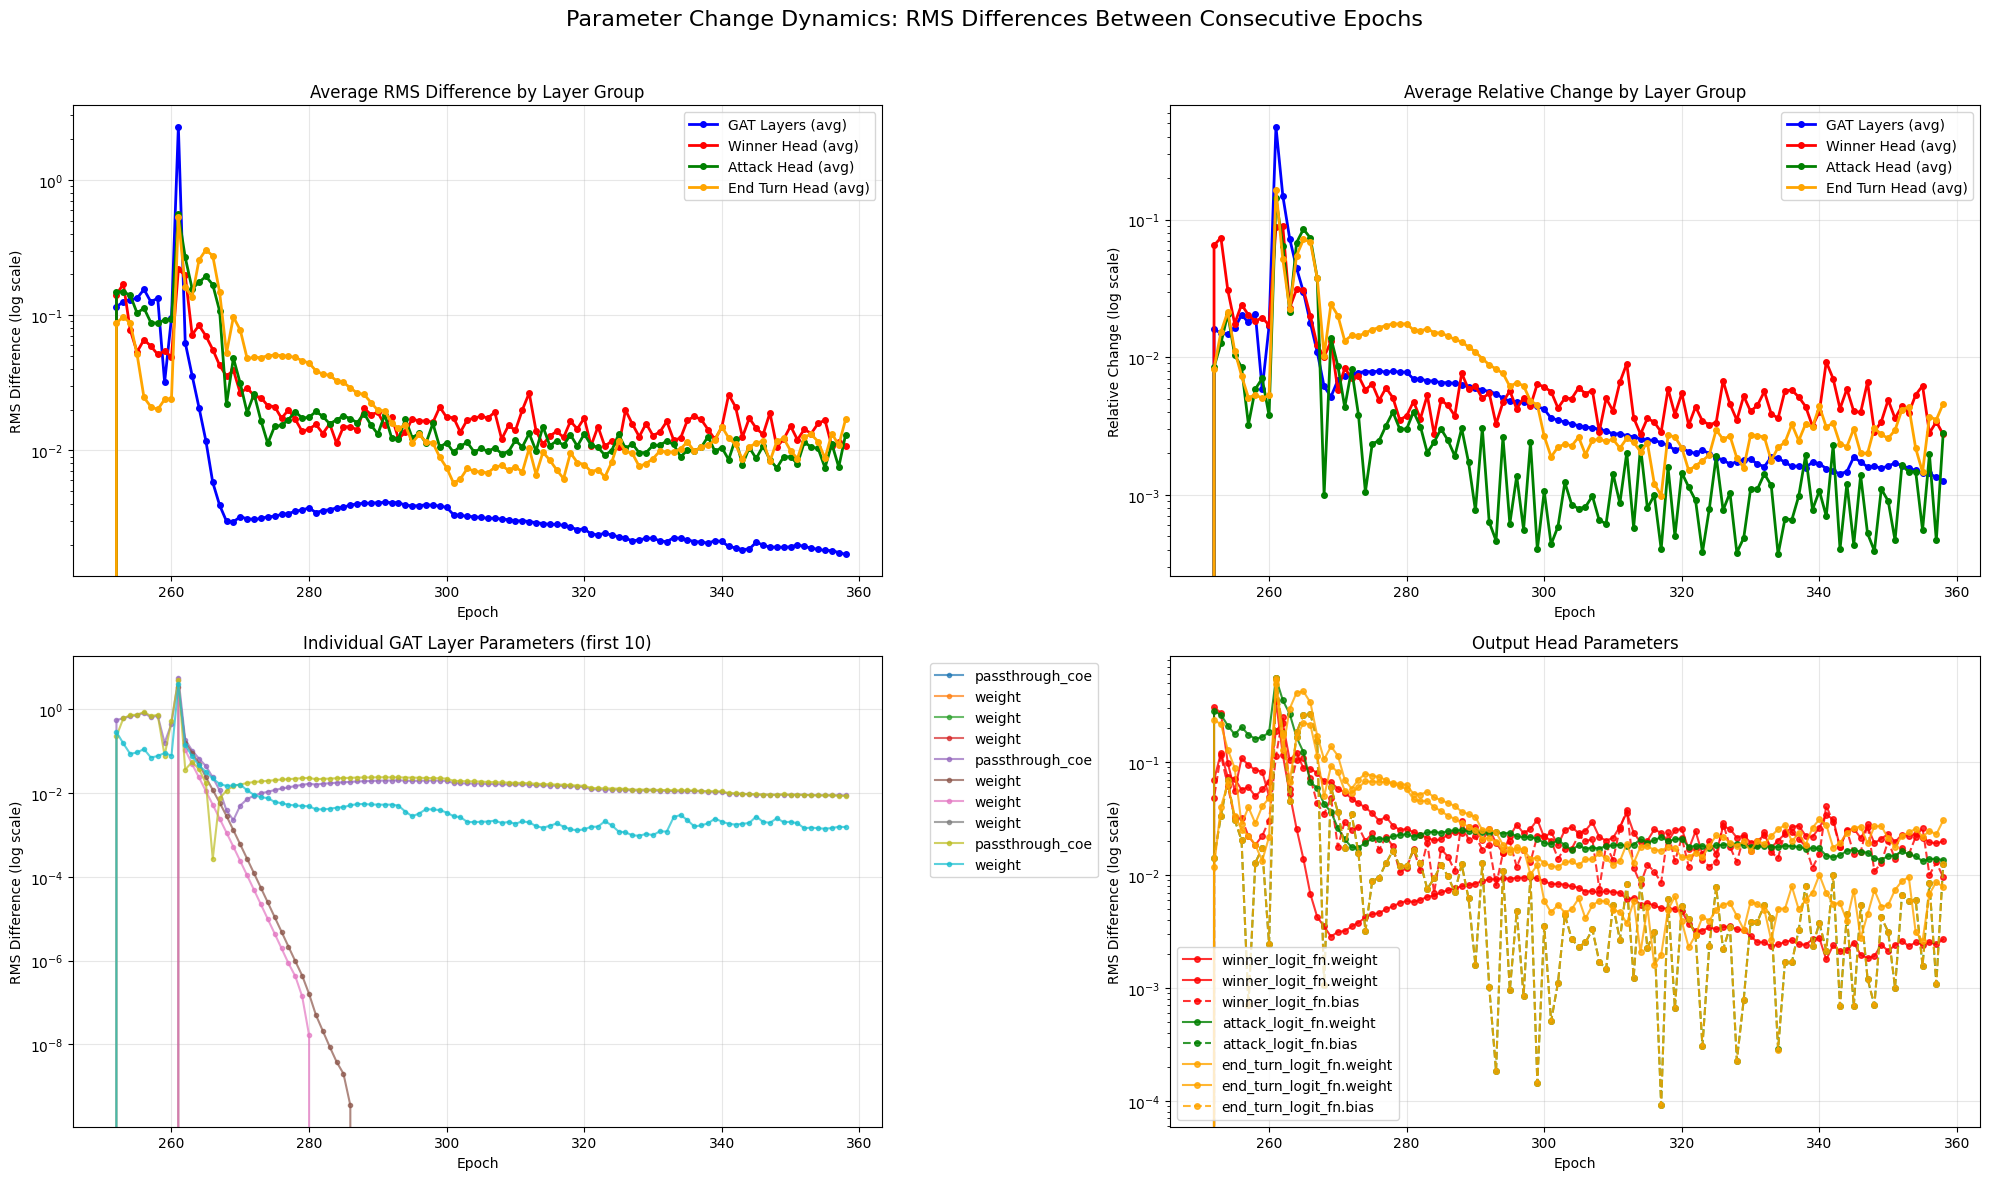

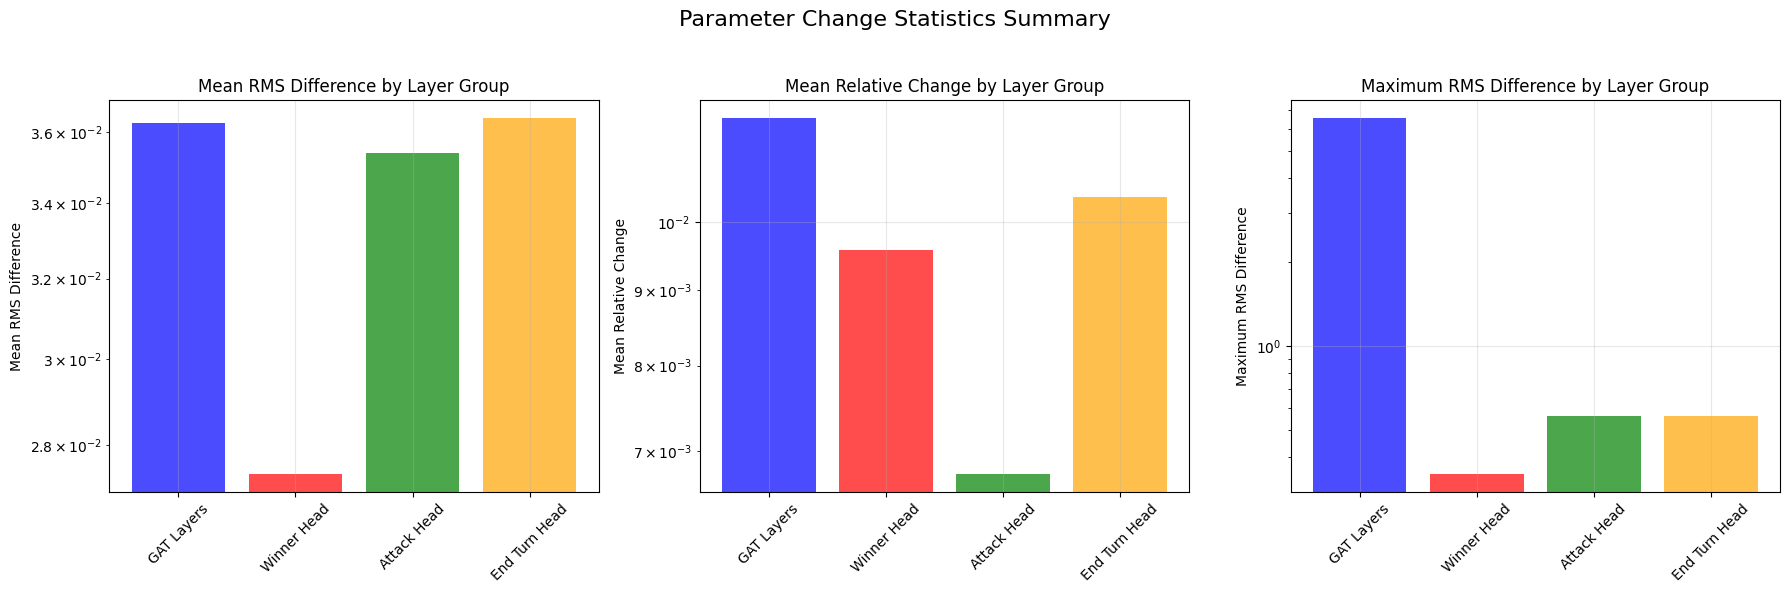

\nParameter Change Summary Statistics:
GAT Layers:
  Mean RMS Difference: 0.036260
  Mean Relative Change: 0.011767
  Max RMS Difference: 6.536632

Winner Head:
  Mean RMS Difference: 0.027347
  Mean Relative Change: 0.009582
  Max RMS Difference: 0.347589

Attack Head:
  Mean RMS Difference: 0.035393
  Mean Relative Change: 0.006752
  Max RMS Difference: 0.560398

End Turn Head:
  Mean RMS Difference: 0.036396
  Mean Relative Change: 0.010399
  Max RMS Difference: 0.560398



In [127]:
# Visualization functions for parameter changes
def plot_parameter_change_dynamics(param_changes, epochs_analyzed):
    """
    Create comprehensive visualizations of parameter change dynamics
    """
    if param_changes is None:
        print("No parameter change data to plot")
        return
    
    import matplotlib.pyplot as plt
    import numpy as np
    from collections import defaultdict
    import re
    
    # Group parameters by layer type
    param_groups = defaultdict(list)
    for param_name in param_changes.keys():
        if 'gat_layers' in param_name:
            param_groups['GAT Layers'].append(param_name)
        elif 'winner_logit' in param_name:
            param_groups['Winner Head'].append(param_name)
        elif 'attack_logit' in param_name:
            param_groups['Attack Head'].append(param_name)
        elif 'end_turn' in param_name:
            param_groups['End Turn Head'].append(param_name)
        else:
            param_groups['Other'].append(param_name)
    
    # Plot 1: RMS Differences Over Time by Layer Group
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('Parameter Change Dynamics: RMS Differences Between Consecutive Epochs', fontsize=16)
    
    # Colors for different groups
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    group_colors = dict(zip(param_groups.keys(), colors))
    
    # Top-left: All parameters grouped by type (log scale)
    ax1 = axes[0, 0]
    for group_name, param_list in param_groups.items():
        if not param_list:
            continue
        
        # Calculate mean RMS diff for this group
        group_rms_diffs = []
        epochs = param_changes[param_list[0]]['epochs']  # All should have same epochs
        
        for epoch_idx in range(len(epochs)):
            epoch_group_diffs = [param_changes[param]['rms_diff'][epoch_idx] for param in param_list]
            group_rms_diffs.append(np.mean(epoch_group_diffs))
        
        ax1.plot(epochs, group_rms_diffs, 'o-', label=f'{group_name} (avg)', 
                color=group_colors[group_name], linewidth=2, markersize=4)
    
    ax1.set_yscale('log')
    ax1.set_title('Average RMS Difference by Layer Group')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('RMS Difference (log scale)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Top-right: Relative changes by layer group
    ax2 = axes[0, 1]
    for group_name, param_list in param_groups.items():
        if not param_list:
            continue
        
        # Calculate mean relative change for this group
        group_rel_changes = []
        epochs = param_changes[param_list[0]]['epochs']
        
        for epoch_idx in range(len(epochs)):
            epoch_group_changes = [param_changes[param]['relative_change'][epoch_idx] for param in param_list]
            group_rel_changes.append(np.mean(epoch_group_changes))
        
        ax2.plot(epochs, group_rel_changes, 'o-', label=f'{group_name} (avg)', 
                color=group_colors[group_name], linewidth=2, markersize=4)
    
    ax2.set_yscale('log')
    ax2.set_title('Average Relative Change by Layer Group')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Relative Change (log scale)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Bottom-left: Individual GAT layer parameters
    ax3 = axes[1, 0]
    gat_params = param_groups.get('GAT Layers', [])
    if gat_params:
        for i, param_name in enumerate(gat_params[:10]):  # Show first 10 to avoid clutter
            epochs = param_changes[param_name]['epochs']
            rms_diffs = param_changes[param_name]['rms_diff']
            short_name = param_name.split('.')[-1][:15]  # Shorten name for legend
            ax3.plot(epochs, rms_diffs, 'o-', label=short_name, alpha=0.7, markersize=3)
    
    ax3.set_yscale('log')
    ax3.set_title('Individual GAT Layer Parameters (first 10)')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('RMS Difference (log scale)')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)
    
    # Bottom-right: Head layer parameters
    ax4 = axes[1, 1]
    head_groups = ['Winner Head', 'Attack Head', 'End Turn Head']
    for group_name in head_groups:
        param_list = param_groups.get(group_name, [])
        for param_name in param_list:
            epochs = param_changes[param_name]['epochs']
            rms_diffs = param_changes[param_name]['rms_diff']
            param_type = param_name.split('.')[0]
            weight_or_bias = 'bias' if 'bias' in param_name else 'weight'
            label = f'{param_type}.{weight_or_bias}'
            ax4.plot(epochs, rms_diffs, 'o-', label=label, 
                    color=group_colors[group_name], alpha=0.8, markersize=4,
                    linestyle='--' if 'bias' in param_name else '-')
    
    ax4.set_yscale('log')
    ax4.set_title('Output Head Parameters')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('RMS Difference (log scale)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Plot 2: Parameter Change Statistics Summary
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Parameter Change Statistics Summary', fontsize=16)
    
    # Calculate summary statistics for each parameter
    param_stats = {}
    for param_name, changes in param_changes.items():
        param_stats[param_name] = {
            'mean_rms_diff': np.mean(changes['rms_diff']),
            'std_rms_diff': np.std(changes['rms_diff']),
            'max_rms_diff': np.max(changes['rms_diff']),
            'mean_rel_change': np.mean(changes['relative_change']),
            'max_rel_change': np.max(changes['relative_change'])
        }
    
    # Group statistics by layer type
    group_stats = {}
    for group_name, param_list in param_groups.items():
        if not param_list:
            continue
        group_stats[group_name] = {
            'mean_rms_diff': np.mean([param_stats[p]['mean_rms_diff'] for p in param_list]),
            'mean_rel_change': np.mean([param_stats[p]['mean_rel_change'] for p in param_list]),
            'max_rms_diff': np.max([param_stats[p]['max_rms_diff'] for p in param_list])
        }
    
    # Bar plot of mean RMS differences by group
    ax1 = axes[0]
    groups = list(group_stats.keys())
    mean_rms = [group_stats[g]['mean_rms_diff'] for g in groups]
    bars1 = ax1.bar(groups, mean_rms, color=[group_colors[g] for g in groups], alpha=0.7)
    ax1.set_title('Mean RMS Difference by Layer Group')
    ax1.set_ylabel('Mean RMS Difference')
    ax1.set_yscale('log')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    # Bar plot of mean relative changes by group
    ax2 = axes[1]
    mean_rel = [group_stats[g]['mean_rel_change'] for g in groups]
    bars2 = ax2.bar(groups, mean_rel, color=[group_colors[g] for g in groups], alpha=0.7)
    ax2.set_title('Mean Relative Change by Layer Group')
    ax2.set_ylabel('Mean Relative Change')
    ax2.set_yscale('log')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)
    
    # Bar plot of maximum RMS differences by group
    ax3 = axes[2]
    max_rms = [group_stats[g]['max_rms_diff'] for g in groups]
    bars3 = ax3.bar(groups, max_rms, color=[group_colors[g] for g in groups], alpha=0.7)
    ax3.set_title('Maximum RMS Difference by Layer Group')
    ax3.set_ylabel('Maximum RMS Difference')
    ax3.set_yscale('log')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Print summary statistics
    print("\\nParameter Change Summary Statistics:")
    print("=" * 60)
    for group_name, stats in group_stats.items():
        print(f"{group_name}:")
        print(f"  Mean RMS Difference: {stats['mean_rms_diff']:.6f}")
        print(f"  Mean Relative Change: {stats['mean_rel_change']:.6f}")
        print(f"  Max RMS Difference: {stats['max_rms_diff']:.6f}")
        print()

# Create the visualizations
if 'param_changes' in locals() and param_changes is not None:
    plot_parameter_change_dynamics(param_changes, epochs_analyzed)
else:
    print("Parameter change analysis not completed. Please run the previous cell first.")

Parameter Convergence Analysis:


/tmp/ipykernel_3239408/97529154.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  'reduction_ratio': group_rms_diffs[-1] / group_rms_diffs[0]


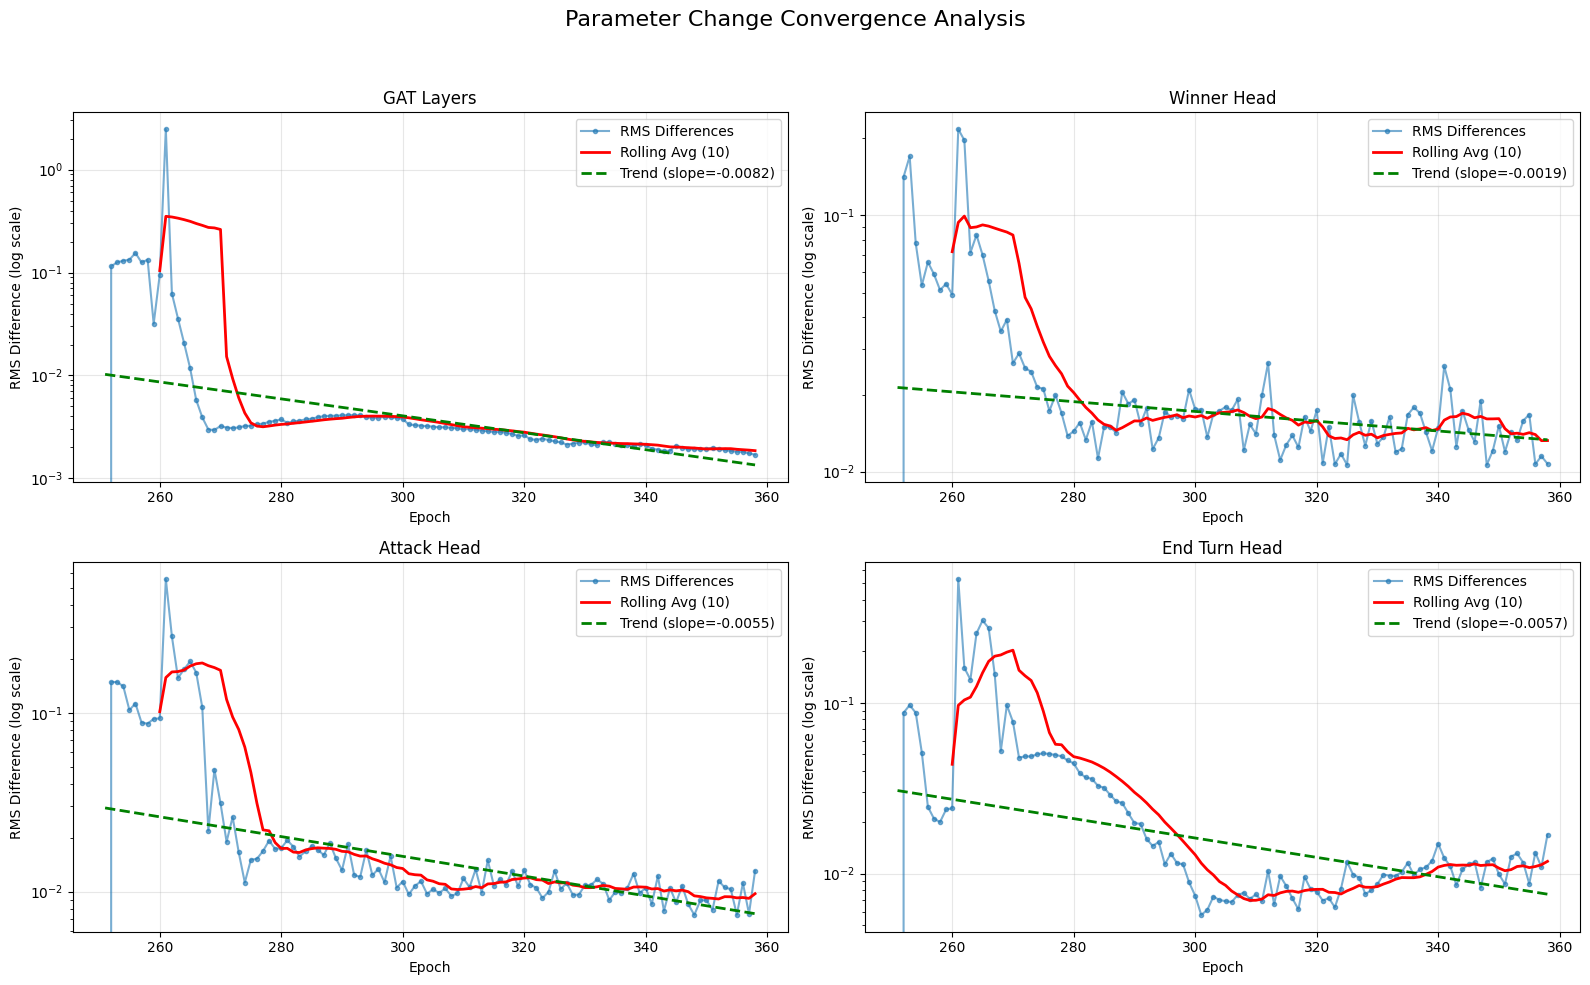

\nConvergence Statistics:
------------------------------
GAT Layers:
  Trend slope (log scale): -0.008223
  R-squared: 0.0780
  P-value: 0.003426
  Initial RMS: 0.000000
  Final RMS: 0.001701
  Reduction ratio: inf
  Status: Converging (decreasing changes)

Winner Head:
  Trend slope (log scale): -0.001909
  R-squared: 0.0050
  P-value: 0.468325
  Initial RMS: 0.000000
  Final RMS: 0.010734
  Reduction ratio: inf
  Status: Converging (decreasing changes)

Attack Head:
  Trend slope (log scale): -0.005523
  R-squared: 0.0375
  P-value: 0.044572
  Initial RMS: 0.000000
  Final RMS: 0.013060
  Reduction ratio: inf
  Status: Converging (decreasing changes)

End Turn Head:
  Trend slope (log scale): -0.005670
  R-squared: 0.0385
  P-value: 0.041962
  Initial RMS: 0.000000
  Final RMS: 0.016943
  Reduction ratio: inf
  Status: Converging (decreasing changes)

\nEpochs with Largest Parameter Changes:
----------------------------------------
 1. Epoch 261: Total RMS change = 33.017925
 2. Epoc

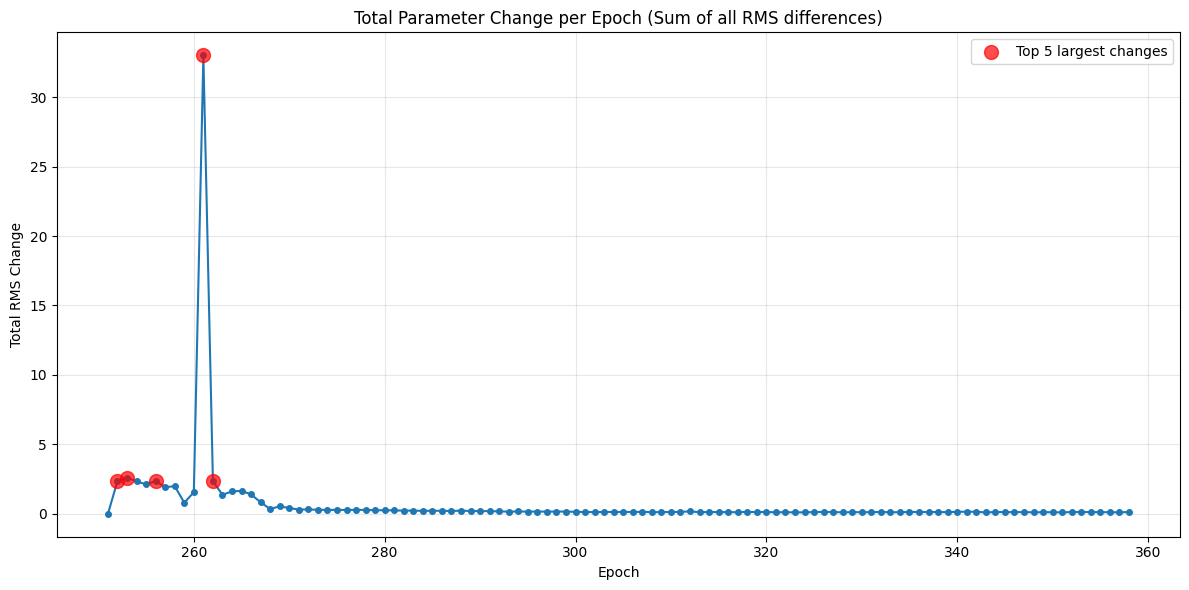

In [128]:
# Additional Analysis: Parameter Change Trends and Convergence
def analyze_parameter_convergence(param_changes, window_size=10):
    """
    Analyze parameter convergence by looking at trends in RMS differences
    """
    if param_changes is None:
        print("No parameter change data available")
        return
    
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import stats
    
    print("Parameter Convergence Analysis:")
    print("=" * 50)
    
    convergence_stats = {}
    
    # Analyze trends for each parameter group
    param_groups = {
        'GAT Layers': [name for name in param_changes.keys() if 'gat_layers' in name],
        'Winner Head': [name for name in param_changes.keys() if 'winner_logit' in name],
        'Attack Head': [name for name in param_changes.keys() if 'attack_logit' in name],
        'End Turn Head': [name for name in param_changes.keys() if 'end_turn' in name]
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Parameter Change Convergence Analysis', fontsize=16)
    axes = axes.flatten()
    
    for idx, (group_name, param_list) in enumerate(param_groups.items()):
        if not param_list or idx >= 4:
            continue
            
        ax = axes[idx]
        
        # Calculate group average RMS differences
        epochs = param_changes[param_list[0]]['epochs']
        group_rms_diffs = []
        
        for epoch_idx in range(len(epochs)):
            epoch_group_diffs = [param_changes[param]['rms_diff'][epoch_idx] for param in param_list]
            group_rms_diffs.append(np.mean(epoch_group_diffs))
        
        # Plot raw data
        ax.plot(epochs, group_rms_diffs, 'o-', alpha=0.6, label='RMS Differences', markersize=3)
        
        # Calculate rolling average
        if len(group_rms_diffs) >= window_size:
            rolling_avg = np.convolve(group_rms_diffs, np.ones(window_size)/window_size, mode='valid')
            rolling_epochs = epochs[window_size-1:]
            ax.plot(rolling_epochs, rolling_avg, '-', linewidth=2, label=f'Rolling Avg ({window_size})', color='red')
        
        # Calculate trend (linear regression on log scale)
        if len(epochs) > 5:
            log_rms = np.log10(np.array(group_rms_diffs) + 1e-10)
            slope, intercept, r_value, p_value, std_err = stats.linregress(epochs, log_rms)
            
            # Plot trend line
            trend_line = 10**(slope * np.array(epochs) + intercept)
            ax.plot(epochs, trend_line, '--', linewidth=2, label=f'Trend (slope={slope:.4f})', color='green')
            
            convergence_stats[group_name] = {
                'slope': slope,
                'r_squared': r_value**2,
                'p_value': p_value,
                'final_rms': group_rms_diffs[-1],
                'initial_rms': group_rms_diffs[0],
                'reduction_ratio': group_rms_diffs[-1] / group_rms_diffs[0]
            }
        
        ax.set_yscale('log')
        ax.set_title(f'{group_name}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('RMS Difference (log scale)')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Print convergence statistics
    print("\\nConvergence Statistics:")
    print("-" * 30)
    for group_name, stats in convergence_stats.items():
        print(f"{group_name}:")
        print(f"  Trend slope (log scale): {stats['slope']:.6f}")
        print(f"  R-squared: {stats['r_squared']:.4f}")
        print(f"  P-value: {stats['p_value']:.6f}")
        print(f"  Initial RMS: {stats['initial_rms']:.6f}")
        print(f"  Final RMS: {stats['final_rms']:.6f}")
        print(f"  Reduction ratio: {stats['reduction_ratio']:.4f}")
        
        # Interpret the slope
        if stats['slope'] < -0.001:
            print(f"  Status: Converging (decreasing changes)")
        elif stats['slope'] > 0.001:
            print(f"  Status: Diverging (increasing changes)")
        else:
            print(f"  Status: Stable (minimal trend)")
        print()
    
    return convergence_stats

# Analyze parameter change patterns over time
def analyze_change_patterns(param_changes):
    """
    Analyze patterns in parameter changes (spikes, periodic behavior, etc.)
    """
    if param_changes is None:
        return
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Find epochs with largest overall changes
    epochs = None
    total_changes_per_epoch = []
    
    for param_name, changes in param_changes.items():
        if epochs is None:
            epochs = changes['epochs']
        
        # Pad total_changes_per_epoch if needed
        while len(total_changes_per_epoch) < len(changes['rms_diff']):
            total_changes_per_epoch.append(0)
        
        # Add this parameter's changes to the total
        for i, rms_diff in enumerate(changes['rms_diff']):
            total_changes_per_epoch[i] += rms_diff
    
    # Find top 10 epochs with largest changes
    if len(total_changes_per_epoch) > 0:
        epoch_change_pairs = list(zip(epochs, total_changes_per_epoch))
        epoch_change_pairs.sort(key=lambda x: x[1], reverse=True)
        
        print("\\nEpochs with Largest Parameter Changes:")
        print("-" * 40)
        for i, (epoch, total_change) in enumerate(epoch_change_pairs[:10]):
            print(f"{i+1:2d}. Epoch {epoch}: Total RMS change = {total_change:.6f}")
    
    # Plot total change per epoch
    if len(epochs) > 0:
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        ax.plot(epochs, total_changes_per_epoch, 'o-', markersize=4)
        ax.set_title('Total Parameter Change per Epoch (Sum of all RMS differences)')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Total RMS Change')
        ax.grid(True, alpha=0.3)
        
        # Highlight top 5 largest changes
        if len(epoch_change_pairs) >= 5:
            top_epochs = [pair[0] for pair in epoch_change_pairs[:5]]
            top_changes = [pair[1] for pair in epoch_change_pairs[:5]]
            ax.scatter(top_epochs, top_changes, color='red', s=100, alpha=0.7, 
                      label='Top 5 largest changes', zorder=5)
            ax.legend()
        
        plt.tight_layout()
        plt.show()

# Run the convergence analysis
if 'param_changes' in locals() and param_changes is not None:
    convergence_stats = analyze_parameter_convergence(param_changes, window_size=10)
    analyze_change_patterns(param_changes)
else:
    print("Parameter change analysis not completed. Please run the analysis cell first.")

# Parameter Change Dynamics Analysis Summary

The parameter change dynamics analysis provides insights into how the model's weights evolve during training:

## Key Metrics:

1. **RMS Difference**: Root Mean Squared difference between consecutive epoch parameters
   - Measures absolute magnitude of parameter updates
   - Higher values indicate larger parameter changes

2. **Relative Change**: RMS difference normalized by the current parameter magnitude
   - Measures relative magnitude of updates compared to parameter size
   - Better for comparing parameters of different scales

## Visualizations:

1. **Parameter Change Dynamics**: Shows how different layer groups change over time
2. **Convergence Analysis**: Analyzes trends to determine if parameters are stabilizing
3. **Change Patterns**: Identifies epochs with unusually large parameter updates

## Interpretation:

- **Decreasing trends** suggest the model is converging and stabilizing
- **Large spikes** may indicate learning rate issues or challenging training examples
- **Different layer behaviors** can reveal which parts of the model are still adapting
- **Relative changes** help identify which layers are changing most significantly relative to their current values

This analysis complements the loss curves by showing the internal parameter dynamics that drive the observed performance changes.

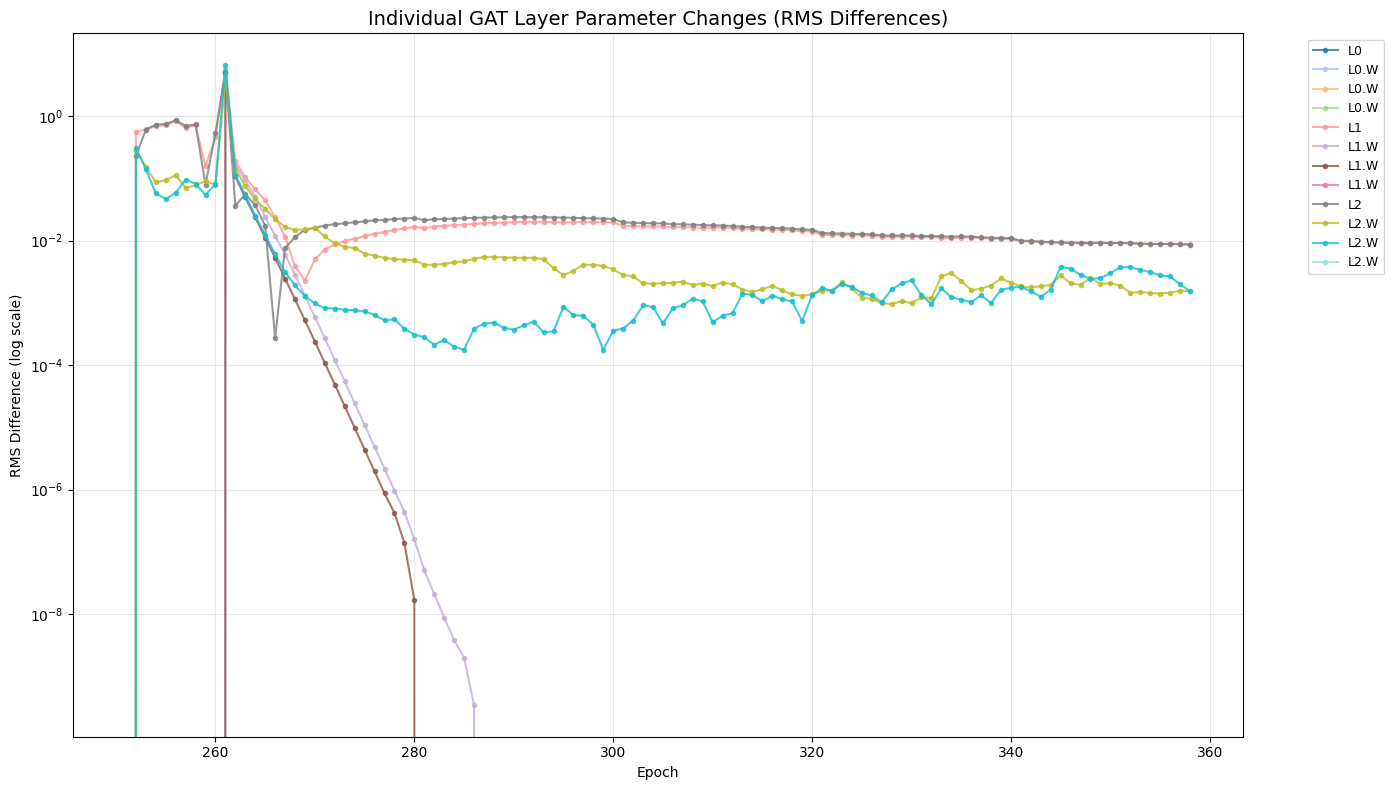

\nGAT Layer Parameter Change Summary:
gat_layers.0.passthrough_coef:
  Mean RMS Diff: 0.000000
  Max RMS Diff:  0.000000
  Final RMS Diff: 0.000000

gat_layers.0.message_fn.transform_fn.weight:
  Mean RMS Diff: 0.000000
  Max RMS Diff:  0.000000
  Final RMS Diff: 0.000000

gat_layers.0.attention_coef_fn.transform_fn.weight:
  Mean RMS Diff: 0.000000
  Max RMS Diff:  0.000000
  Final RMS Diff: 0.000000

gat_layers.0.residual_proj.weight:
  Mean RMS Diff: 0.000000
  Max RMS Diff:  0.000000
  Final RMS Diff: 0.000000

gat_layers.1.passthrough_coef:
  Mean RMS Diff: 0.117643
  Max RMS Diff:  5.682963
  Final RMS Diff: 0.008751

gat_layers.1.message_fn.transform_fn.weight:
  Mean RMS Diff: 0.034340
  Max RMS Diff:  3.357901
  Final RMS Diff: 0.000000

gat_layers.1.attention_coef_fn.transform_fn.weight:
  Mean RMS Diff: 0.047492
  Max RMS Diff:  4.928164
  Final RMS Diff: 0.000000

gat_layers.1.residual_proj.weight:
  Mean RMS Diff: 0.000000
  Max RMS Diff:  0.000000
  Final RMS Diff: 0.0000

In [ ]:
# Simple GAT Layer Parameter Changes Visualization
def plot_individual_gat_changes(param_changes):
    """
    Create separate subplots showing RMS differences for each GAT layer parameter
    """
    if param_changes is None:
        print("No parameter change data available")
        return
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Filter GAT layer parameters
    gat_params = {}
    for param_name, changes in param_changes.items():
        if 'gat_layers' in param_name:
            gat_params[param_name] = changes
    
    if not gat_params:
        print("No GAT layer parameters found")
        return
    
    # Calculate grid dimensions
    n_params = len(gat_params)
    n_cols = 3
    n_rows = int(np.ceil(n_params / n_cols))
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    fig.suptitle('Individual GAT Layer Parameter Changes (RMS Differences)', fontsize=16)
    
    # Flatten axes for easier indexing
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    # Plot each GAT parameter on separate axes
    for i, (param_name, changes) in enumerate(gat_params.items()):
        ax = axes[i]
        
        epochs = changes['epochs']
        rms_diffs = changes['rms_diff']
        
        # Create a readable label from the parameter name
        parts = param_name.split('.')
        layer_info = []
        for part in parts:
            if 'gat_layers' in part:
                continue
            if part.isdigit():
                layer_info.append(f"L{part}")
            elif part in ['weight', 'bias']:
                layer_info.append(part[0].upper())  # W for weight, B for bias
            elif len(part) <= 8:  # Short meaningful parts
                layer_info.append(part)
        
        title = '.'.join(layer_info) if layer_info else param_name.split('.')[-1]
        
        # Plot the line
        ax.plot(epochs, rms_diffs, 'o-', color='blue', 
                linewidth=2, markersize=4, alpha=0.8)
        
        ax.set_yscale('log')
        ax.set_title(title, fontsize=12)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('RMS Diff (log)')
        ax.grid(True, alpha=0.3)
        
        # Add statistics text
        mean_change = np.mean(rms_diffs)
        final_change = rms_diffs[-1]
        ax.text(0.02, 0.98, f'Mean: {mean_change:.4f}\nFinal: {final_change:.4f}', 
                transform=ax.transAxes, verticalalignment='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Hide unused subplots
    for i in range(n_params, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
    plt.show()
    
    # Print summary for GAT layers
    print("\\nGAT Layer Parameter Change Summary:")
    print("=" * 50)
    for param_name, changes in gat_params.items():
        mean_change = np.mean(changes['rms_diff'])
        max_change = np.max(changes['rms_diff'])
        final_change = changes['rms_diff'][-1]
        
        print(f"{param_name}:")
        print(f"  Mean RMS Diff: {mean_change:.6f}")
        print(f"  Max RMS Diff:  {max_change:.6f}")
        print(f"  Final RMS Diff: {final_change:.6f}")
        print()

# Create the GAT visualization
if 'param_changes' in locals() and param_changes is not None:
    plot_individual_gat_changes(param_changes)
else:
    print("Parameter change analysis not completed. Please run the parameter analysis cell first.")

In [129]:
!pip install scipy

In [130]:

plt.close('all')